Wisconsin Breast Cancer Analysis:

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

Target Variable: Diagnosis

Description: Predict Type of Diagnosis needed for Breast Cancer patient's depending upon the variables.

Exploring the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading the dataset
Breast_Cancer_Wisconsin_Diagnostic=pd.read_csv("D:\\DS\\Python\\Practice Datasets\\archive\\data.csv", encoding='latin')

In [3]:
# Start observing the Quantitative/Categorical/Qualitative variables
Breast_Cancer_Wisconsin_Diagnostic.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
Breast_Cancer_Wisconsin_Diagnostic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
Breast_Cancer_Wisconsin_Diagnostic.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [6]:
# Looking at the statistial distribution of the data
Breast_Cancer_Wisconsin_Diagnostic.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [7]:
# Removing duplicate rows if any
print("Before Deleting Duplicates",Breast_Cancer_Wisconsin_Diagnostic.shape)
Breast_Cancer_Wisconsin_Diagnostic=Breast_Cancer_Wisconsin_Diagnostic.drop_duplicates()
print("After Deleting Duplicates",Breast_Cancer_Wisconsin_Diagnostic.shape)

Before Deleting Duplicates (569, 33)
After Deleting Duplicates (569, 33)


In [8]:
#Removing Useless columns
Useless_cols=['id','Unnamed: 32']
Breast_Cancer_Wisconsin_Diagnostic= Breast_Cancer_Wisconsin_Diagnostic.drop(Useless_cols, axis=1)
Breast_Cancer_Wisconsin_Diagnostic.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#finding the columns names
Breast_Cancer_Wisconsin_Diagnostic.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Grouping Continous and Categorical cols

In [10]:
Continous_Cols=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
Categorical_cols=['diagnosis']

Observe the distribution of target variable

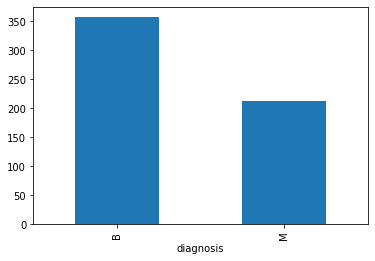

In [11]:
#observe Distribution of the Target Variable
%matplotlib inline
Groupeddata=Breast_Cancer_Wisconsin_Diagnostic.groupby('diagnosis').size()
Groupeddata.plot(kind='bar')

Visualize distribution of all the numeric Predictor variables in the data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B181C0F48>,
      dtype=object)

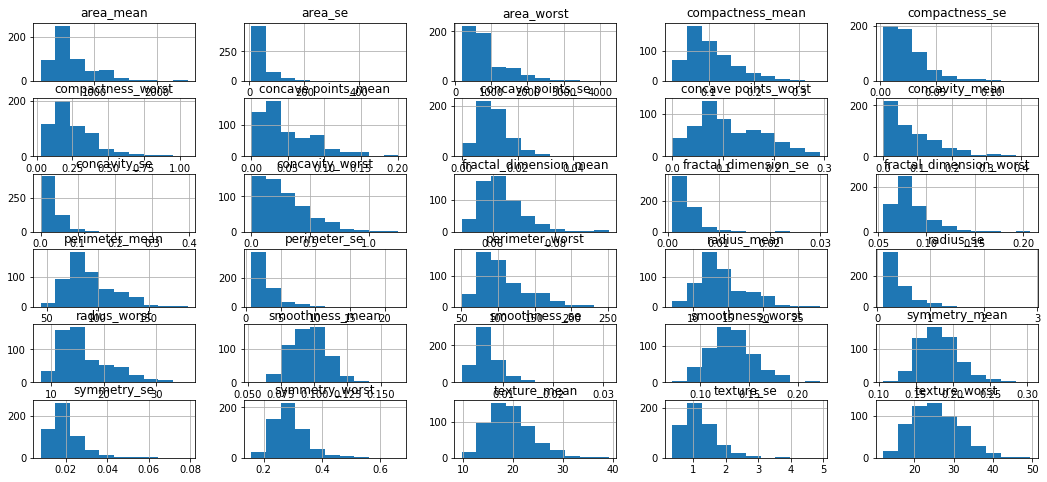

In [12]:
#Uni Variate Analaysis
# Plotting histograms of multiple columns together
Breast_Cancer_Wisconsin_Diagnostic.hist(Continous_Cols, figsize=(18,8))

Visual exploration of relationship between variables
-Continuous Vs Continuous ---- Scatter Plot
-Categorical Vs Continuous---- Bar Plot, Box Plot
-Categorical Vs Categorical---- Bar Plot

In [13]:
#Bi Variate Analysis

def plotbarcharts(inpdata, colstoplot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    fig, subPlot=plt.subplots(nrows=1,ncols=len(colstoplot), figsize=(30,10))
    fig.suptitle('The Bar charts of Categorical Vs Continous data')
    
    for colname ,plotnumber in zip(colstoplot, range(len(colstoplot))):
        inpdata.groupby('diagnosis').mean()[colname].plot(kind='bar', ax=subPlot[plotnumber], figsize=(20,10))
                

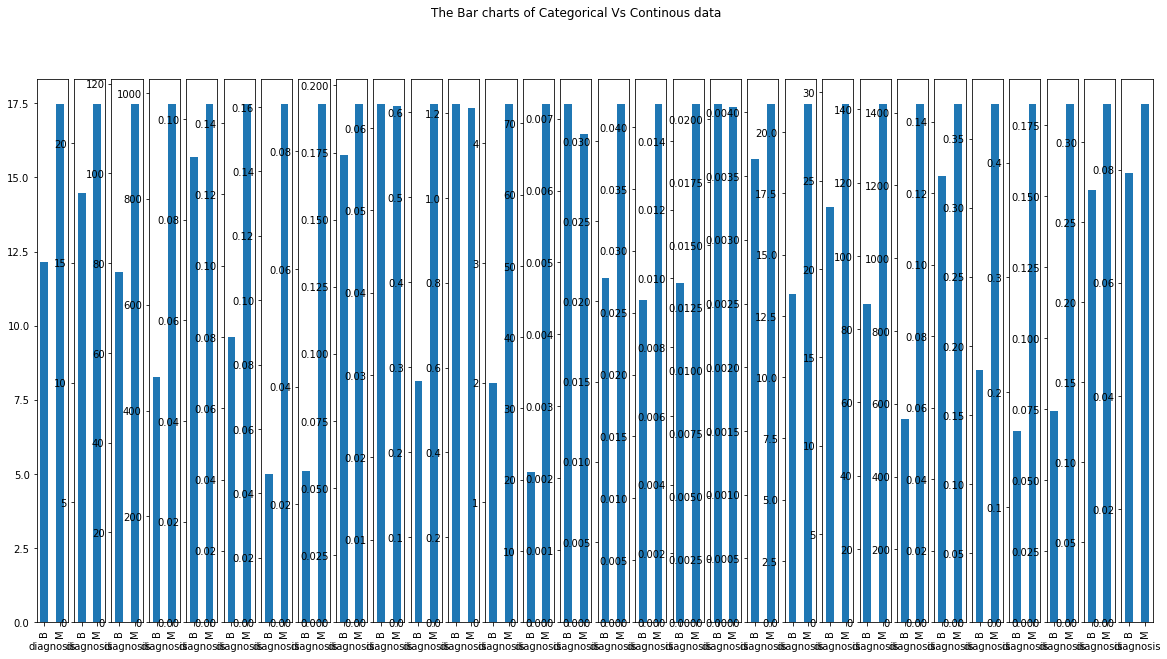

In [14]:
# Calling the function
plotbarcharts(inpdata=Breast_Cancer_Wisconsin_Diagnostic, colstoplot=Continous_Cols)

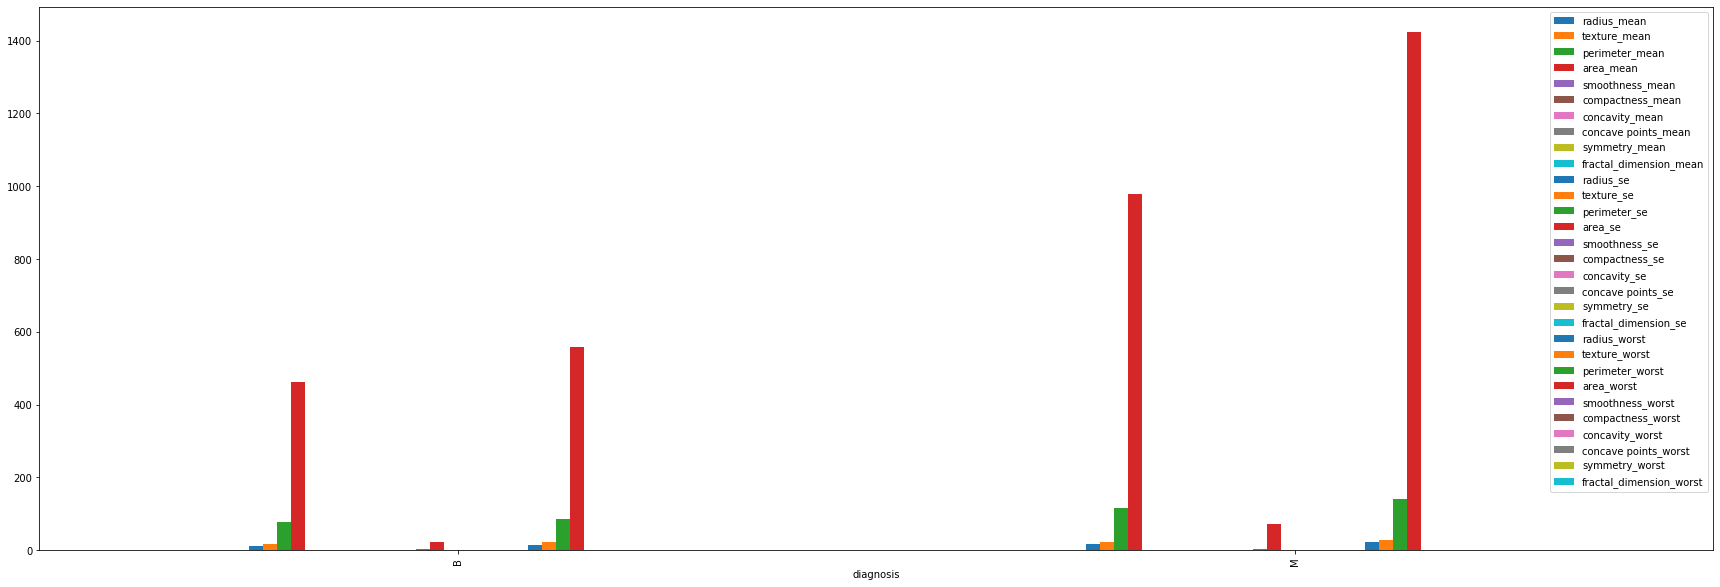

In [15]:
Breast_Cancer_Wisconsin_Diagnostic.groupby('diagnosis').mean()[Continous_Cols].plot(kind='bar', figsize=(30,10))

In [16]:
#Box plot

def plotboxchart(inpdata=Breast_Cancer_Wisconsin_Diagnostic, colstoplot=Continous_Cols):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colstoplot),figsize=(20,20))
    fig.suptitle('The Box Plots')
    
    for colsname, plotnumber in zip(colstoplot,range(len(colstoplot))):
        inpdata.boxplot(colstoplot,'diagnosis', figsize=(20,20), vert=True, ax=subPlot[plotnumber])

C:\Users\Goku\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
C:\Users\Goku\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
C:\Users\Goku\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
C:\Users\Goku\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
C:\Users\Goku\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
C:\Users\Goku\anaconda3\lib\site-pa

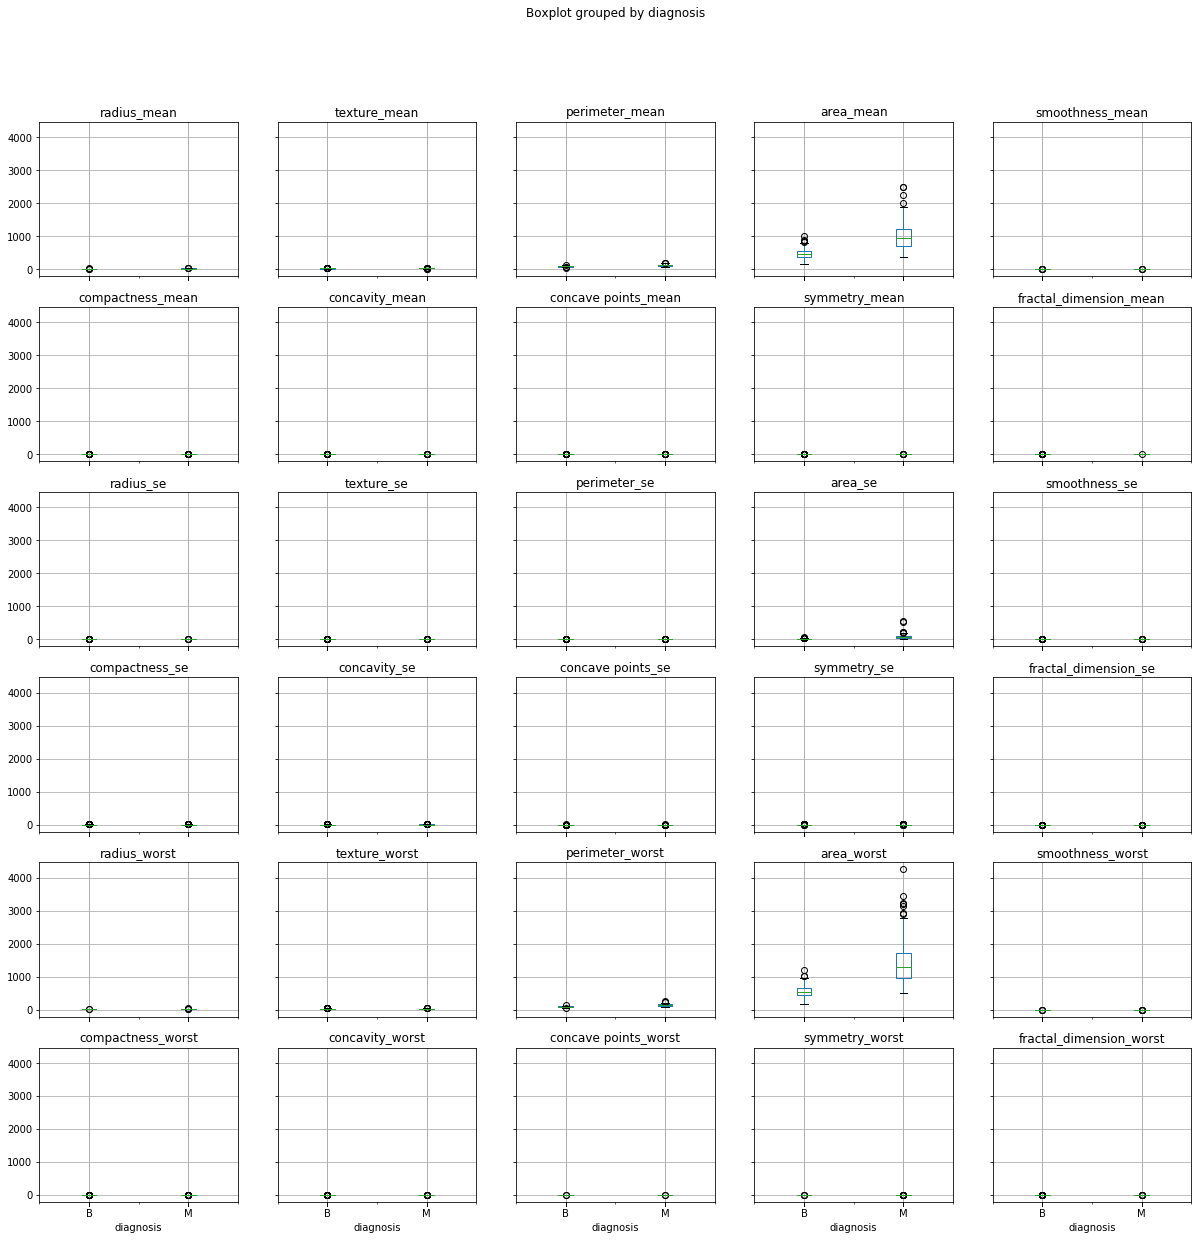

In [17]:
plotboxchart()

In [18]:
#Anova Test

from scipy.stats import f_oneway

CategoryGroup=Breast_Cancer_Wisconsin_Diagnostic.groupby('diagnosis')['radius_mean'].apply(list)
AnovaResults=f_oneway(*CategoryGroup)
np.set_printoptions(suppress=True)
print("The P value is", np.round(AnovaResults[1],3))

The P value is 0.0


Statistical measurement of relationship between variables

-Continuous Vs Continuous ---- Correlation matrix
-Categorical Vs Continuous---- ANOVA test
-Categorical Vs Categorical--- Chi-Square test

#Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test.

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

-Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
-ANOVA Test result: Probability of H0 being true

In [19]:
#Creating user defined ANOVA function for feature selection process
def functionANova(inpdata, targetvar, Predictors):
    
    from scipy.stats import f_oneway
    Var=[]
    Notimp=[]
    for i in Predictors:
        CategoryGroupLists=inpdata.groupby(targetvar)[i].apply(list)
        AnovaResults=f_oneway(*CategoryGroupLists)
        np.set_printoptions(suppress=True)
        
        if(AnovaResults[1]<=0.05):
            Var.append(i)    
        else:
            Notimp.append(i)
            
    print("Selected Variables",Var)
    print("Not Selected Variables",Notimp)

In [20]:
#Calling the Function
functionANova(inpdata=Breast_Cancer_Wisconsin_Diagnostic, targetvar=['diagnosis'], Predictors=Continous_Cols)

Selected Variables ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Not Selected Variables ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']


Data Pre-processing for Machine Learning

In [22]:
#Treating Outliers

Breast_Cancer_Wisconsin_Diagnostic.sort_values(by=['area_worst'], ascending=False)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
461,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.168900,0.2061,...,36.040,31.37,251.20,4254.0,0.1357,0.42560,0.6833,0.26250,0.2641,0.07427
265,M,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.086460,0.1769,...,32.490,47.16,214.00,3432.0,0.1401,0.26440,0.3442,0.16590,0.2868,0.08218
352,M,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,...,33.130,23.58,229.30,3234.0,0.1530,0.59370,0.6451,0.27560,0.3690,0.08815
180,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.187800,0.1800,...,33.120,32.85,220.80,3216.0,0.1472,0.40340,0.5340,0.26880,0.2856,0.08082
368,M,21.710,17.25,140.90,1546.0,0.09384,0.08562,0.11680,0.084650,0.1717,...,30.750,26.44,199.50,3143.0,0.1363,0.16280,0.2861,0.18200,0.2510,0.06494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,...,9.077,30.92,57.17,248.0,0.1256,0.08340,0.0000,0.00000,0.3058,0.09938
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.1297,0.13570,0.0688,0.02564,0.3105,0.07409
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.000000,0.2163,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.00000,0.3142,0.08116
539,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,...,8.678,31.89,54.49,223.6,0.1596,0.30640,0.3393,0.05000,0.2790,0.10660


In [23]:
# Imputing the outlier values with a logical business value
Breast_Cancer_Wisconsin_Diagnostic['area_worst'][Breast_Cancer_Wisconsin_Diagnostic['area_worst']>4000]=3432
Breast_Cancer_Wisconsin_Diagnostic['area_worst'].describe()

C:\Users\Goku\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count     569.000000
mean      879.138489
std       561.774844
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      3432.000000
Name: area_worst, dtype: float64

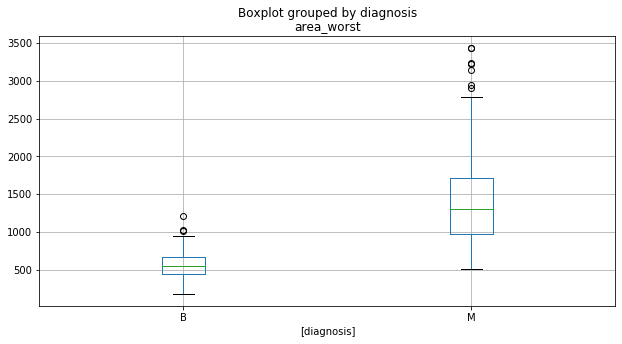

In [24]:
#checking the variable after outlier treatment
Breast_Cancer_Wisconsin_Diagnostic.boxplot('area_worst',Categorical_cols, figsize=(10,5))

In [25]:
# Finding out how many missing values are present in each column
Breast_Cancer_Wisconsin_Diagnostic.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [26]:
## Treating nominal variable diagnosis , as it is a binary variable should be done. But for right now we are just renaming the variables.
Breast_Cancer_Wisconsin_Diagnostic['diagnosis'].replace({'B':'Benign','M':'Malignant'}, inplace=True)
Breast_Cancer_Wisconsin_Diagnostic.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# Saving the processed data as a pickle file for later use.
Breast_Cancer_Wisconsin_Diagnostic.to_pickle('Breast_Cancer_Wisconsin_Diagnostic_ML')

Machine Learning: Splitting the data into Training and Testing sample

In [28]:
# Separate Target Variable and Predictor Variables
TargetVariable='diagnosis'
Predictors=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
            'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
            'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

X=Breast_Cancer_Wisconsin_Diagnostic[Predictors].values
Y=Breast_Cancer_Wisconsin_Diagnostic[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3, random_state=143)

In [29]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(398, 25)
(398,)
(171, 25)
(171,)


Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=1, penalty='l2', solver='lbfgs')
print(clf)
# Creating the model on Training Data
LOG=clf.fit(X_train,Y_train)
prediction=LOG.predict(X_test)
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))
# Printing the Overall Accuracy of the model
F1_score=metrics.classification_report(Y_test,prediction).split()[-2]
print(F1_score)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=Y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97       112
   Malignant       0.93      0.95      0.94        59

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171

[[108   4]
 [  3  56]]
0.96


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,Predicteddiagnosis
0,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.3534,...,92.15,638.4,0.1429,0.2042,0.13770,0.10800,0.2668,0.08174,Benign,Benign
1,16.270,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.4375,...,129.80,1121.0,0.1590,0.2947,0.35970,0.15830,0.3103,0.08200,Malignant,Malignant
2,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.2621,...,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,Benign,Benign
3,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.3428,...,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,Benign,Benign
4,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.2773,...,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,Benign,Benign


Decision Trees

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

      Benign       0.93      1.00      0.96       112
   Malignant       1.00      0.85      0.92        59

    accuracy                           0.95       171
   macro avg       0.96      0.92      0.94       171
weighted avg       0.95      0.95      0.95       171

[[112   0]
 [  9  50]]
Accuracy 0.95


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,Predicteddiagnosis
0,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.3534,...,92.15,638.4,0.1429,0.2042,0.13770,0.10800,0.2668,0.08174,Benign,Benign
1,16.270,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.4375,...,129.80,1121.0,0.1590,0.2947,0.35970,0.15830,0.3103,0.08200,Malignant,Malignant
2,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.2621,...,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,Benign,Benign
3,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.3428,...,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,Benign,Benign
4,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.2773,...,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,Benign,Benign


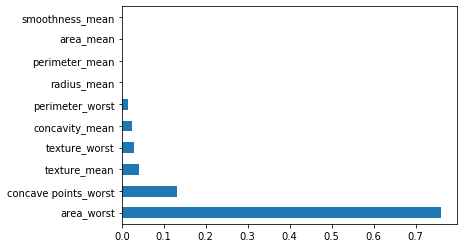

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3)
print(clf)
# Creating the model on Training Data
DTree=clf.fit(X_train, Y_train)
prediction=DTree.predict(X_test)
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction ))
print(metrics.confusion_matrix(Y_test, prediction))
# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(Y_test, prediction ).split()[-2]
print('Accuracy',F1_Score)
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(DTree.feature_importances_, index= Predictors)
feature_importances.nlargest(10).plot(kind='barh')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=Y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

Plotting a Decision Tree

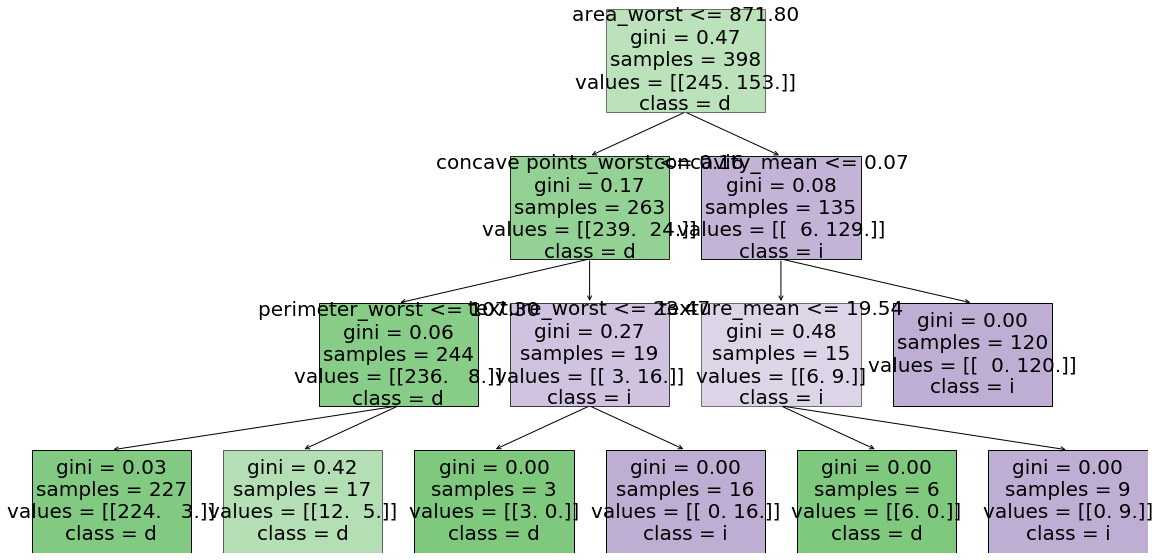

In [32]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt

dtree=dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable )
fig =dtree.view()

currentFigure=plt.gcf()
currentFigure.set_size_inches(20,10)

Random Forest (Bagging of multiple Decision Trees)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97       112
   Malignant       0.98      0.90      0.94        59

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171

[[111   1]
 [  6  53]]
accuracy 0.96


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Targetvar,Predicteddiagnosis
0,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.3534,...,92.15,638.4,0.1429,0.2042,0.13770,0.10800,0.2668,0.08174,Benign,Benign
1,16.270,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.4375,...,129.80,1121.0,0.1590,0.2947,0.35970,0.15830,0.3103,0.08200,Malignant,Malignant
2,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.2621,...,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,Benign,Benign
3,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.3428,...,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,Benign,Benign
4,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.2773,...,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,Benign,Benign


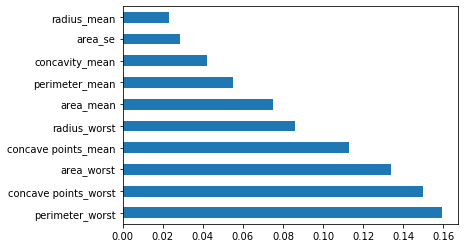

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=3,n_estimators=200, criterion='entropy')
print(clf)
# Creating the model on Training Data
RF=clf.fit(X_train, Y_train)
prediction=RF.predict(X_test)
# Measuring accuracy on Testing Data
from sklearn import metrics 
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))
# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(Y_test, prediction).split()[-2]
print("accuracy",F1_Score)
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=X_test, columns=Predictors)
Testingdataframe['Targetvar']=Y_test
Testingdataframe['Predicted'+TargetVariable]=prediction
Testingdataframe.head()

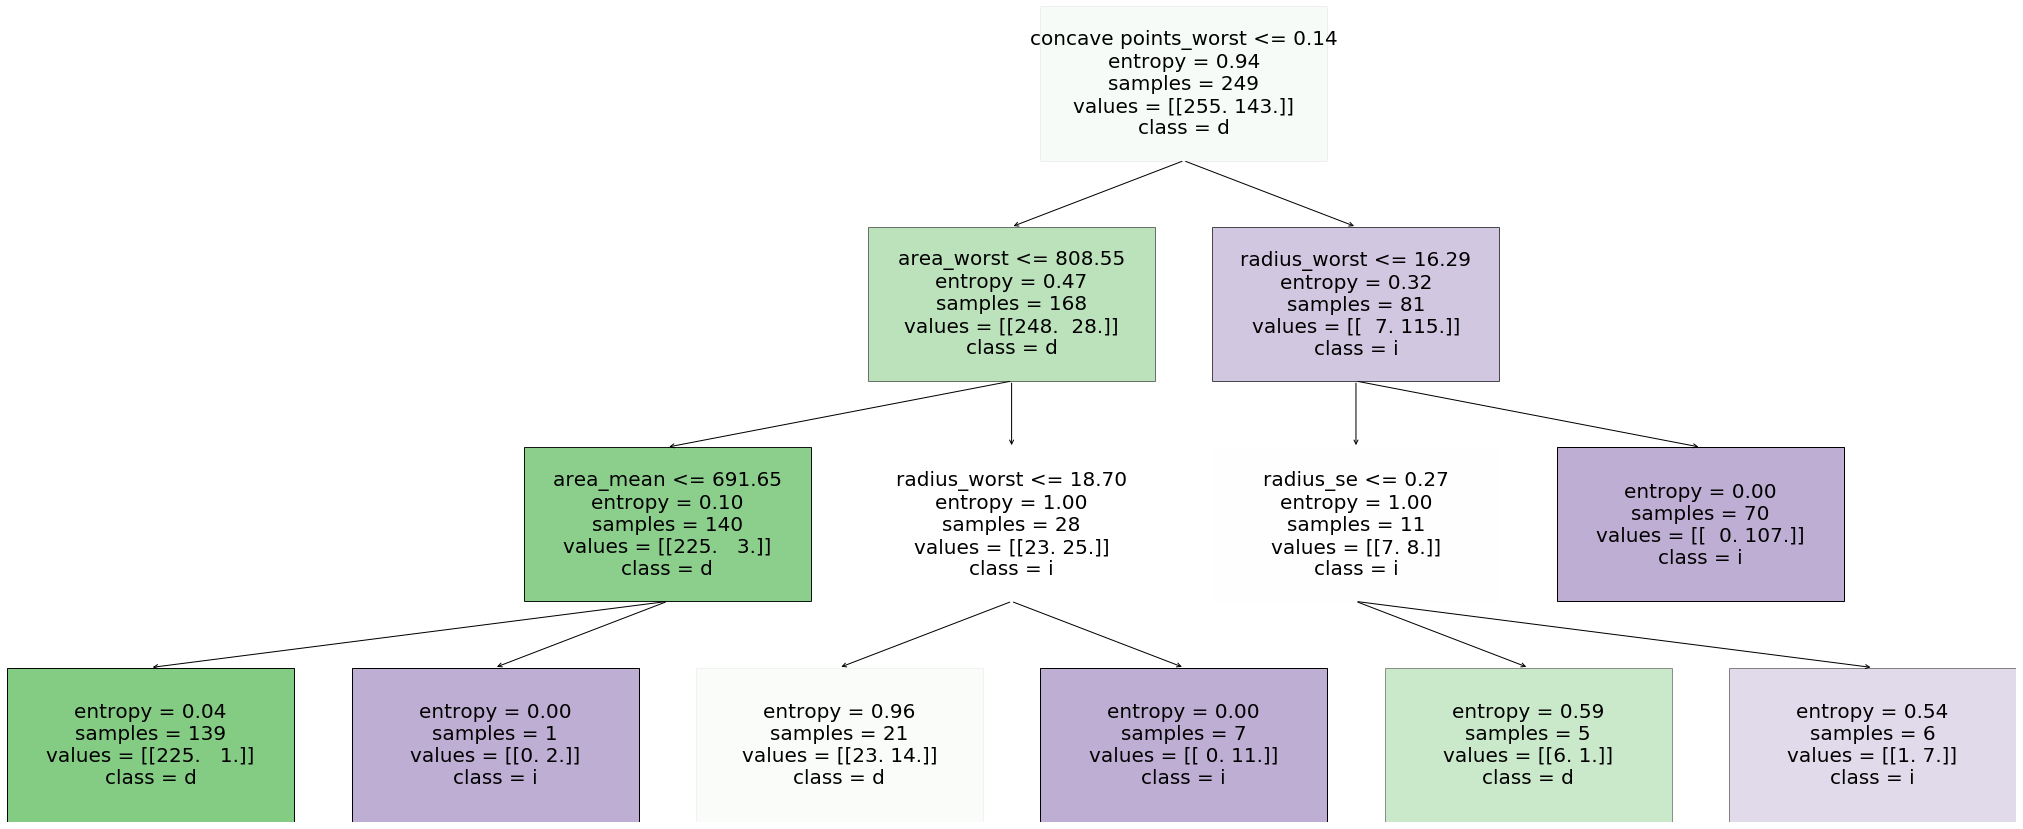

In [34]:
#PLotting 10th single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree=dtreeplt(model=clf.estimators_[10], feature_names=Predictors, target_names=TargetVariable)
fig= dtree.view()

AdaBoost

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Targetvar,Predicteddiagnosis
0,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.3534,...,92.15,638.4,0.1429,0.2042,0.13770,0.10800,0.2668,0.08174,Benign,Benign
1,16.270,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.4375,...,129.80,1121.0,0.1590,0.2947,0.35970,0.15830,0.3103,0.08200,Malignant,Malignant
2,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.2621,...,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,Benign,Benign
3,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.3428,...,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,Benign,Benign
4,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.2773,...,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,Benign,Benign


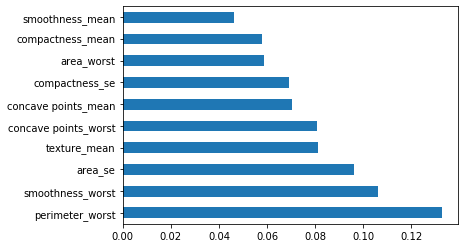

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier(max_depth=2)
clf=AdaBoostClassifier(n_estimators=200, base_estimator=DTC, learning_rate=0.03)
print(clf)
# Creating the model on Training Data
AB=clf.fit(X_train, Y_train)
prediction=AB.predict(X_test)
# Measuring accuracy on Testing Data
from sklearn import metrics 
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))
# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(Y_test, prediction).split()[-2]
print("accuracy",F1_Score)
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=X_test, columns=Predictors)
Testingdataframe['Targetvar']=Y_test
Testingdataframe['Predicted'+TargetVariable]=prediction
Testingdataframe.head()

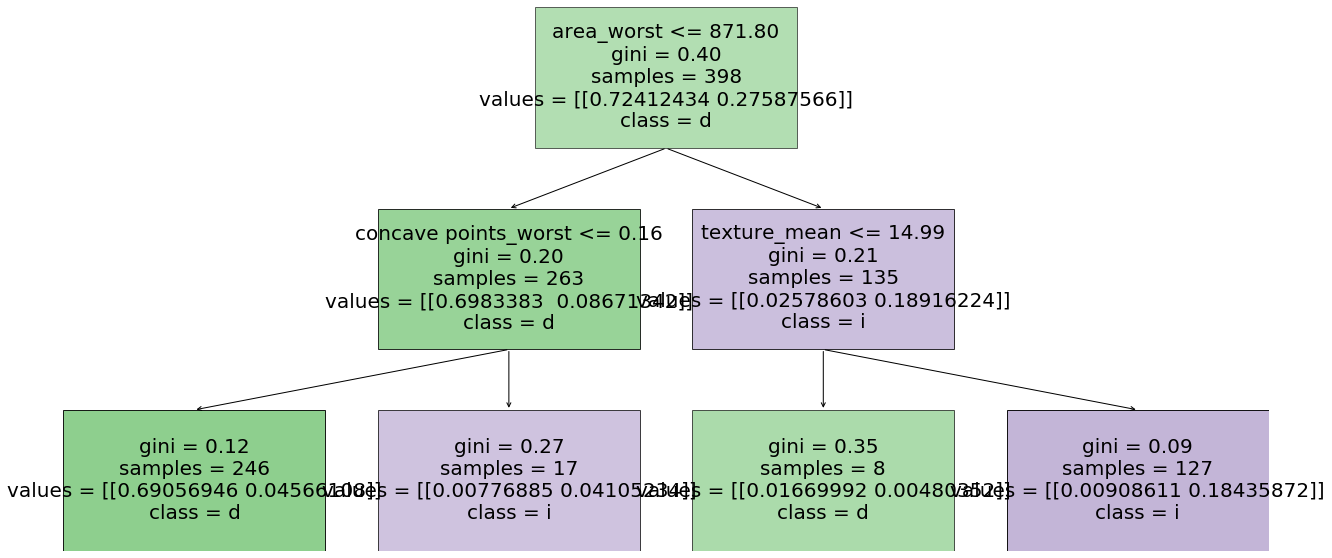

In [36]:
# PLotting 10th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree=dtreeplt(model=clf.estimators_[10], feature_names=Predictors, target_names=TargetVariable)
fig=dtree.view()

XG Boost

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.03, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97       112
   Malignant       0.98      0.90      0.94        59

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171

[[111   1]
 [  

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Targetvar,Predicteddiagnosis
0,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.3534,...,92.15,638.4,0.1429,0.2042,0.13770,0.10800,0.2668,0.08174,Benign,Benign
1,16.270,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.4375,...,129.80,1121.0,0.1590,0.2947,0.35970,0.15830,0.3103,0.08200,Malignant,Malignant
2,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.2621,...,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,Benign,Benign
3,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.3428,...,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,Benign,Benign
4,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.2773,...,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,Benign,Benign


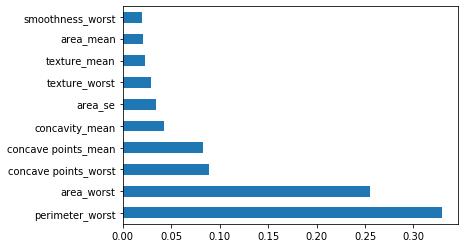

In [37]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.03, n_estimators=200, objective='binary:logistic')
print(clf)
# Creating the model on Training Data
XG=clf.fit(X_train, Y_train)
prediction=XG.predict(X_test)
# Measuring accuracy on Testing Data
from sklearn import metrics 
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))
# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(Y_test, prediction).split()[-2]
print("accuracy",F1_Score)
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(XG.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=X_test, columns=Predictors)
Testingdataframe['Targetvar']=Y_test
Testingdataframe['Predicted'+TargetVariable]=prediction
Testingdataframe.head()

In [38]:
import os 
os.environ['PATH'] += os.pathsep +'C:\\Users\\Goku\\anaconda3\\Library\\bin\\graphviz'

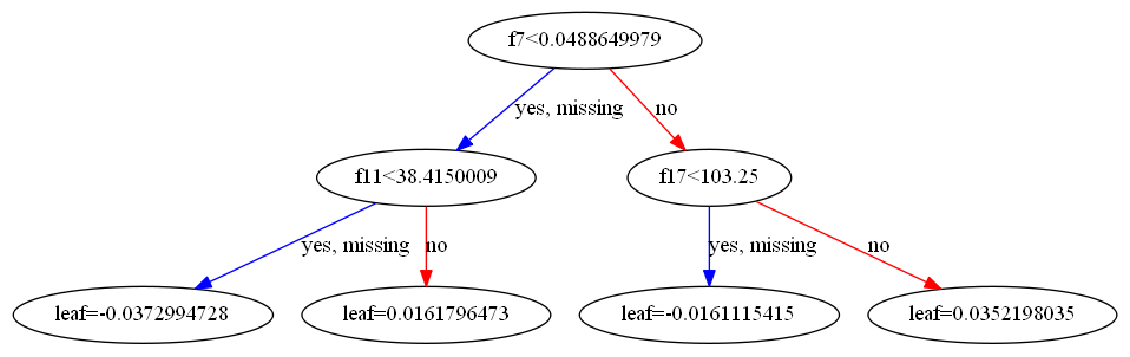

In [39]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, subplot = plt.subplots(figsize=(20, 8))
plot_tree(XG, num_trees=25, ax=subplot)

K-Nearest Neighbor(KNN)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)
print(clf)
# Creating the model on Training Data
KNN=clf.fit(X_train, Y_train)
prediction=KNN.predict(X_test)
# Measuring accuracy on Testing Data
from sklearn import metrics 
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))
# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(Y_test, prediction).split()[-2]
print("accuracy",F1_Score)
# There is no built-in method to get feature importance in KNN
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=X_test, columns=Predictors)
Testingdataframe['Targetvar']=Y_test
Testingdataframe['Predicted'+TargetVariable]=prediction
Testingdataframe.head()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

      Benign       0.95      0.96      0.96       112
   Malignant       0.93      0.90      0.91        59

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[108   4]
 [  6  53]]
accuracy 0.94


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Targetvar,Predicteddiagnosis
0,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.3534,...,92.15,638.4,0.1429,0.2042,0.13770,0.10800,0.2668,0.08174,Benign,Benign
1,16.270,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.4375,...,129.80,1121.0,0.1590,0.2947,0.35970,0.15830,0.3103,0.08200,Malignant,Malignant
2,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.2621,...,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,Benign,Benign
3,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.3428,...,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,Benign,Benign
4,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.2773,...,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,Benign,Benign


Support Vector Machines(SVM)

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96       112
   Malignant       0.96      0.90      0.93        59

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

[[110   2]
 [  6  53]]
accuracy 0.95


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Targetvar,Predicteddiagnosis
0,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.3534,...,92.15,638.4,0.1429,0.2042,0.13770,0.10800,0.2668,0.08174,Benign,Benign
1,16.270,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.4375,...,129.80,1121.0,0.1590,0.2947,0.35970,0.15830,0.3103,0.08200,Malignant,Malignant
2,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.2621,...,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,Benign,Benign
3,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.3428,...,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,Benign,Benign
4,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.2773,...,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,Benign,Benign


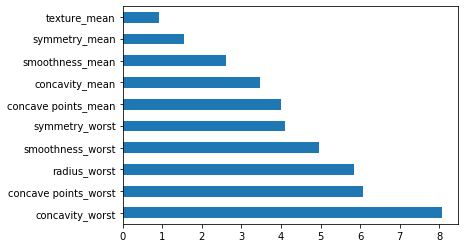

In [41]:
from sklearn import svm
clf=svm.SVC(C=20, kernel='linear', gamma=0.03)
print(clf)
# Creating the model on Training Data
SVM=clf.fit(X_train, Y_train)
prediction=SVM.predict(X_test)
# Measuring accuracy on Testing Data
from sklearn import metrics 
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))
# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(Y_test, prediction).split()[-2]
print("accuracy",F1_Score)
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(SVM.coef_[0], index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=X_test, columns=Predictors)
Testingdataframe['Targetvar']=Y_test
Testingdataframe['Predicted'+TargetVariable]=prediction
Testingdataframe.head()

Navie BAyes

In [42]:
from sklearn.naive_bayes import GaussianNB
# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf=GaussianNB()
print(clf)

NB=clf.fit(X_train, Y_train)
prediction=NB.predict(X_test)
# Measuring accuracy on Testing Data
from sklearn import metrics 
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))
# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(Y_test, prediction).split()[-2]
print("accuracy",F1_Score)
# Printing some sample values of prediction
Testingdataframe=pd.DataFrame(data=X_test, columns=Predictors)
Testingdataframe['Targetvar']=Y_test
Testingdataframe['Predicted'+TargetVariable]=prediction
Testingdataframe.head()

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

      Benign       0.95      0.96      0.96       112
   Malignant       0.93      0.90      0.91        59

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[108   4]
 [  6  53]]
accuracy 0.94


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Targetvar,Predicteddiagnosis
0,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.3534,...,92.15,638.4,0.1429,0.2042,0.13770,0.10800,0.2668,0.08174,Benign,Benign
1,16.270,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.4375,...,129.80,1121.0,0.1590,0.2947,0.35970,0.15830,0.3103,0.08200,Malignant,Malignant
2,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.2621,...,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,Benign,Benign
3,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.3428,...,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187,Benign,Benign
4,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.2773,...,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,Benign,Benign


Principal Component Analysis

-In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set.
-It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.
-With fewer variables, visualization also becomes much more meaningful. PCA is more useful when dealing with high dimensional data(more than 20 columns).

In [43]:
#PCA is not required for this analysis. But performed it know for sure whether is there any improvement in accuracy of the model.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
TargetVariables='diagnosis'
Predictorss=['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
# Extracting the target variable array Y and Predictor variables array X
X=Breast_Cancer_Wisconsin_Diagnostic[Predictorss].values
Y=Breast_Cancer_Wisconsin_Diagnostic[TargetVariables].values

In [45]:
# Creating maximum components equal to the total number of columns to analyze all of them
pca=PCA(n_components=29)
# fitting the data
pca_fit=pca.fit(X)
# calculating the principal components
reduced_X= pca_fit.transform(X)
#5 Columns present in X are now represented by 29 Principal components present in reduced_X
print(np.round(reduced_X[0:5],2))

[[1159.56 -299.79   60.26   -5.13   31.08    0.61    0.98   -0.38   -0.83
     0.52   -0.41    0.09    0.05    0.07   -0.01   -0.      0.01    0.01
    -0.02   -0.05    0.02    0.      0.      0.01    0.01    0.     -0.
     0.      0.  ]
 [1270.43    5.93  -35.68   17.37   -5.1    -0.08   -0.01   -0.01    0.46
    -0.05    0.1     0.02    0.04   -0.01    0.03   -0.03    0.01   -0.01
     0.02    0.02    0.      0.02    0.      0.01   -0.01    0.     -0.
    -0.      0.  ]
 [ 997.24   32.29   -2.67    4.62   -0.89   -2.88   -0.71    0.42    0.06
    -0.18    0.27   -0.01    0.09    0.03   -0.02   -0.04    0.01   -0.03
     0.     -0.01   -0.01   -0.     -0.     -0.      0.     -0.      0.
     0.     -0.  ]
 [-406.35  -65.33   11.18  -11.26    7.56    1.27   -1.3    -0.04    0.34
    -0.14    0.95   -0.16    0.29    0.08    0.04   -0.03    0.03   -0.02
    -0.05   -0.03    0.01    0.01    0.      0.01   -0.01   -0.     -0.
     0.     -0.  ]
 [ 932.7   182.88   -4.94    9.24    7.1    

In [46]:
# The Amount of variance explained by each principle componnent
var_explained=pca.explained_variance_ratio_
print(np.round(var_explained,2))
# The first component and second component explain 98% and 2% variance of data respectively

[0.98 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


In [47]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_,2)*100)
print(var_explained_cumulative)

[ 98. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100.]


Finding optimal number of Principal components

Text(0, 0.5, '% of Variance')

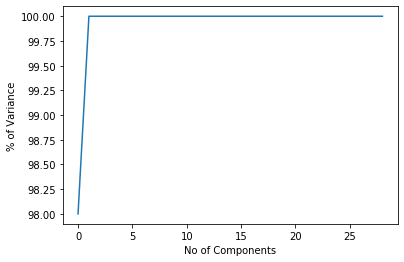

In [48]:
# By Looking at below graph we can see that 2 components are explaining maximum Variance in the dataset
# The elbow occurs at 3rd principal component
plt.plot(range(29), var_explained_cumulative)
plt.xlabel('No of Components')
plt.ylabel('% of Variance')

Creating final number of Principal Components

In [49]:
# Choosing 2-principal components based on above graph
pca=PCA(n_components=2)
# fitting the data
pca_fit=pca.fit(X)
# calculating the principal components
reduced_X= pca_fit.transform(X)
print(np.round(reduced_X[0:5],2))

[[1159.56 -299.79]
 [1270.43    5.93]
 [ 997.24   32.29]
 [-406.35  -65.33]
 [ 932.7   182.88]]


In [50]:
# Printing the factor loadings
# The Coefficient which is multiplied with each column to get 2 Principal Components
loadings = pca.components_
print(loadings)

[[ 0.00515078  0.00222025  0.03551214  0.52197629  0.00000429  0.00004106
   0.0000828   0.0000484   0.00000715 -0.00000266  0.00031392 -0.00006661
   0.0022363   0.05541829 -0.00000082  0.00000555  0.00000891  0.00000331
  -0.00000125 -0.00000009  0.00724112  0.00311097  0.05003464  0.8488853
   0.00000653  0.00010278  0.00017111  0.00007471  0.00001831  0.00000167]
 [ 0.00868939 -0.00295611  0.05901952  0.84722484 -0.00001475 -0.00000733
   0.00007396  0.00004108 -0.00002456 -0.00001554  0.00007422  0.00039973
   0.00177834  0.04237715  0.00000199  0.00001397  0.00003095  0.00000972
   0.00001263  0.00000048 -0.00117967 -0.01373907 -0.00363738 -0.52596562
  -0.00007836 -0.00027577 -0.00019594 -0.00004294 -0.00016614 -0.00005658]]


In [51]:
#Creating new DataFrame for analysis
PCA_Data=pd.DataFrame(reduced_X,columns=["PC1","PC2"])
PCA_Data['TargetVar']=Y
PCA_Data.head()

,PC1,PC2,TargetVar
0,1159.556928,-299.790890,Malignant
1,1270.425295,5.930007,Malignant
2,997.237236,32.288689,Malignant
3,-406.351606,-65.328776,Malignant
4,932.695796,182.876877,Malignant


ML part-2

-Checking this dataset in Logistic Regression algorithm

In [52]:
#Machine Learning: Splitting the data into Training and Testing sample
TargetVariable='TargetVar'
Predictors=['PC1', 'PC2']

X=PCA_Data[Predictors].values
Y=PCA_Data[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3, random_state=143)

Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=1, penalty='l2', solver='lbfgs')
print(clf)

LOG=clf.fit(X_train,Y_train)
prediction=LOG.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

F1_score=metrics.classification_report(Y_test,prediction).split()[-2]
print(F1_score)

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=Y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

      Benign       0.95      0.96      0.95       112
   Malignant       0.91      0.90      0.91        59

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[107   5]
 [  6  53]]
0.94


,PC1,PC2,TargetVar,PredictedTargetVar
0,-307.539052,-38.993024,Benign,Benign
1,290.143435,8.256485,Malignant,Malignant
2,-285.262259,16.298371,Benign,Benign
3,8.420218,10.618429,Benign,Malignant
4,-682.553756,-28.647823,Benign,Benign


In [54]:
#The logistic Regression model with PCA components doesn't show improvement than the normal one.

K Fold Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
#Final Average Accuracy of the model which gave highest Accuracy during ML
Accuracy_Values=cross_val_score(XG, X , Y, cv=10, scoring='f1_weighted')
print(Accuracy_Values)
print('Final Average Accuracy of the model:', Accuracy_Values.mean())

[0.91087391 0.8734143  0.89473684 0.94708706 0.96450925 0.91181177
 0.96491228 0.92982456 0.91329774 0.94615252]
Final Average Accuracy of the model: 0.9256620241885047


ANN

In [58]:
#Reading the saved pickle file 
Breast_Cancer_Wisconsin_Diagnostic_ML=pd.read_pickle('Breast_Cancer_Wisconsin_Diagnostic_ML')
Breast_Cancer_Wisconsin_Diagnostic_ML

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
# Treating nominal variable diagnosis , as it is a binary variable.
Breast_Cancer_Wisconsin_Diagnostic_ML['diagnosis'].replace({'Benign':0,'Malignant':1}, inplace=True)
Breast_Cancer_Wisconsin_Diagnostic_ML.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
# Separate Target Variable and Predictor Variables
TargetVariables='diagnosis'
Predictorss=['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

X=Breast_Cancer_Wisconsin_Diagnostic_ML[Predictorss].values
Y=Breast_Cancer_Wisconsin_Diagnostic_ML[TargetVariables].values

### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Sklearn GridSearchCV

In [61]:
# Function to generate Deep ANN model
def make_classification_ann(Optimizer_Trail, Neuron_Trail):
    from keras.models import Sequential
    from keras.layers import Dense
    # Creating the classifier ANN model
    classifier= Sequential()
    classifier.add(Dense(units=Neuron_Trail,input_dim=30 ,kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neuron_Trail,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trail,loss='binary_crossentropy',metrics=['accuracy'])
    
    return(classifier)

In [62]:
#Creating list of parameters to try.
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Parameter_Trails={'batch_size':[10,20,30], 'epochs':[10,20],
                 "Optimizer_Trail":['adam','rmsprop'],'Neuron_Trail':[5,10]}

classifierModel=KerasClassifier(make_classification_ann,verbose=0)

In [63]:
# Creating the Grid search space
grid_search=GridSearchCV(estimator=classifierModel,
    param_grid=Parameter_Trails,
    scoring='f1',cv=5)

In [64]:
# Measuring how much time it took to find the best params
import time
Start_time=time.time()
# Running Grid Search for different paramenters
grid_search.fit(X,Y,verbose=1)

End_time=time.time()
print('The Time Taken',round((End_time-Start_time)/60),'Minutes')

Epoch 1/10
46/46 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6725
Epoch 2/10
46/46 [==============================] - 0s 1ms/step - loss: 0.6455 - accuracy: 0.8000
Epoch 3/10
46/46 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.9407
Epoch 4/10
46/46 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.9604
Epoch 5/10
46/46 [==============================] - 0s 1ms/step - loss: 0.2351 - accuracy: 0.9626
Epoch 6/10
46/46 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.9648
Epoch 7/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9692
Epoch 8/10
46/46 [==============================] - 0s 999us/step - loss: 0.1167 - accuracy: 0.9736
Epoch 9/10
46/46 [==============================] - 0s 978us/step - loss: 0.1022 - accuracy: 0.9758
Epoch 10/10
46/46 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9802
Instructions fo

In [65]:
grid_search.best_params_

{'Neuron_Trail': 10, 'Optimizer_Trail': 'adam', 'batch_size': 30, 'epochs': 20}

In [66]:
grid_search.best_score_

0.9776565975508673

The Highest Accuracy reached by the ANN model is around 98%. Hence we can say for sure this model predicts accurately.